In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import os
from selenium.webdriver import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

In [5]:
def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Warning: Failed to create the directory.")

In [6]:
# 검색어 지정
search_text = '카카오 데이터 센터'

"MjjYud" - class name

In [9]:
driver = webdriver.Chrome()
driver.get('https://www.google.com/search?q='+ search_text)

print(driver.title)

html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser') 

link_list = []
for i in range(2, 10):
    a = driver.find_element(By.XPATH, '//*[@id="rso"]/div['+str(i)+']')
    link_list.append(a.find_element(By.TAG_NAME, 'a').get_attribute('href'))

print(link_list)
createDirectory('./finded_'+ search_text)

# 검색 결과 페이지에서 하나씩 열어서 내용 전부 크롤링

p_num = 0
for link in link_list:
    driver.get(link)
    html = driver.page_source 
    soup = BeautifulSoup(html, 'html.parser') 
    f = open('./finded_'+ search_text +'/' + str(p_num) + '.txt', 'w', encoding='utf-8')
    f.write(soup.text)
    p_num += 1
    f.close()

driver.close()

카카오 데이터 센터 - Google 검색
['https://www.kakaocorp.com/page/detail/9385', 'https://www.kakaoicloud.com/service/detail/10-27', 'https://www.etnews.com/20221104000073', 'https://www.yna.co.kr/view/AKR20211217076900061', 'https://www.chosun.com/economy/industry-company/2023/06/26/H23QVJGG6ZCTJFKJZKQJCDY4WI/', 'http://www.investchosun.com/site/data/html_dir/2022/10/19/2022101980182.html', 'https://zdnet.co.kr/view/?no=20221016114830', 'https://hyu.wiki/index.php?title=%EC%B9%B4%EC%B9%B4%EC%98%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0&mobileaction=toggle_view_desktop']


KeyboardInterrupt: 

In [12]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [17]:
file_list = os.listdir('./finded_'+ search_text)

file_list.sort()
file_list

['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt']

In [19]:
with open('finded_'+ search_text +'.txt', 'w') as outfile:
    for filename in file_list:
        with open('./finded_' + search_text + '/' + filename) as file:
            outfile.write(file.read())

In [23]:
text = open('finded_'+ search_text +'.txt').read() 

twitter = Twitter()

sentences_tag = []
sentences_tag = twitter.pos(text) 

noun_adj_list = []

for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)

counts = Counter(noun_adj_list)
tags = counts.most_common(40) 

wc = WordCloud(font_path="/Users/kimhyunwoo/Library/Fonts/NanumBarunGothic.ttf",background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))


cloud.to_file('finded_'+ search_text +'.jpg')

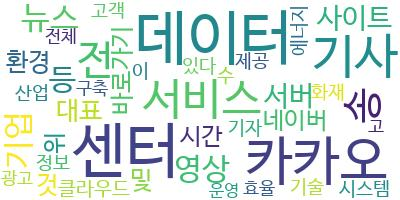

In [25]:
from IPython.display import Image

Image(filename='finded_'+ search_text +'.jpg')